In [1]:
import cv2
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

**ORIGINAL IMAGE**

Saving mmn.jpeg to mmn (2).jpeg


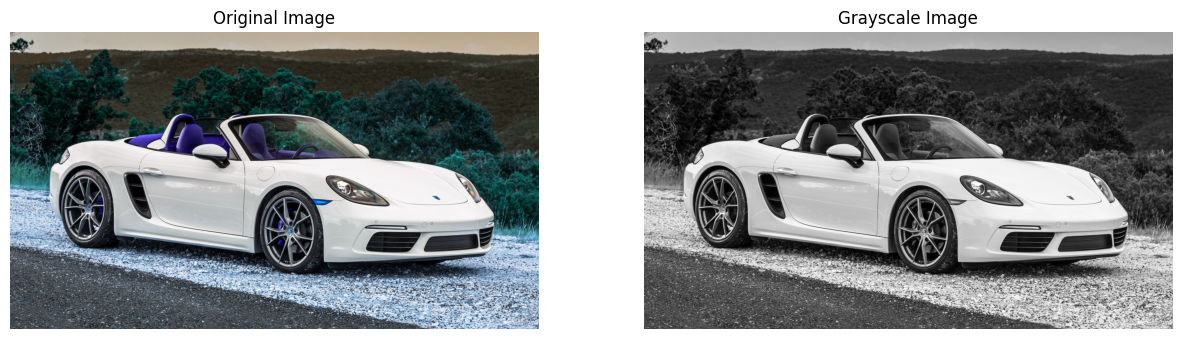

In [19]:
# Fungsi untuk menampilkan gambar berdampingan dengan judul
def show_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 5))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image, cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Upload file gambar
uploaded = files.upload()

# Load gambar
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)  # Membaca gambar yang diunggah
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale

# Menampilkan gambar asli
show_images([image, image_gray], ["Original Image", "Grayscale Image"], cmap='gray')

**MOVING AVERAGE FILTER**

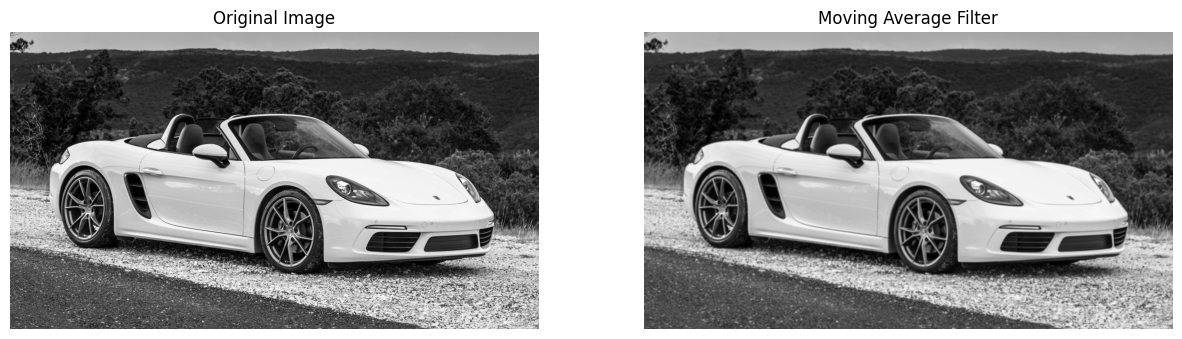

In [24]:
#Moving Average Filter
def moving_average_filter(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Example usage of moving average
signal = np.random.randn(100)
filtered_signal = moving_average_filter(signal, 5)

# Menampilkan hasil
show_images([image_gray, filtered_image], ["Original Image", "Moving Average Filter"], cmap='gray')

*   Menggunakan konvolusi untuk menghaluskan sinyal
*   Window size menentukan tingkat smoothing
*   Berguna untuk mengurangi noise pada data temporal

**FEATURE DETECTION SIFT**

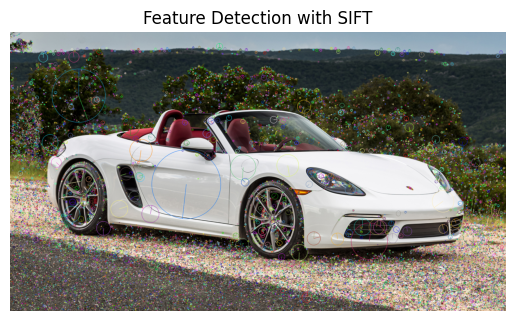

In [54]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image_gray, None)
image_sift = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Menampilkan hasil
plt.imshow(cv2.cvtColor(image_sift, cv2.COLOR_BGR2RGB))
plt.title("Feature Detection with SIFT")
plt.axis('off')
plt.show()

*   Mengonversi gambar ke grayscale untuk deteksi fitur
*   SIFT invariant terhadap rotasi dan skala
*   Mendeteksi keypoint dan mengekstrak deskriptor lokal

**COLOR HISTOGRAM**

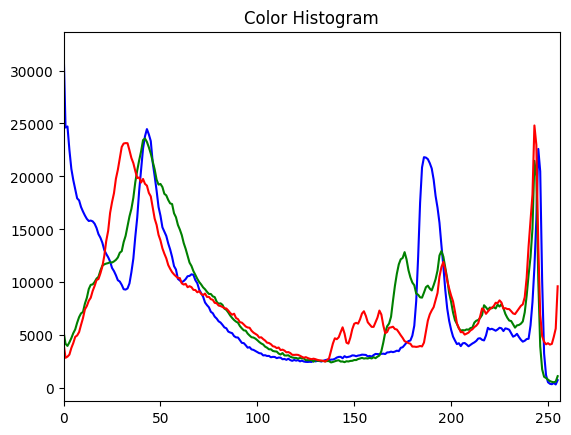

In [56]:
def plot_histogram(image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title("Color Histogram")
    plt.show()

plot_histogram(image)

*   Menghitung distribusi intensitas pixel
*   Terpisah untuk channel BGR
*   256 bin untuk setiap channel warna


**GAUSSIAN SMOOTHING**

In [59]:
# Gaussian Smoothing
def gaussian_smooth(image_path, kernel_size=(5,5), sigma=0):
    img = cv2.imread(image_path)
    plt.subplot(2, 3, 4)
    smooth_img = gaussian_smooth(image_path)
    plt.imshow(cv2.cvtColor(smooth_img, cv2.COLOR_BGR2RGB))
    plt.title('Gaussian Smoothing')
    return cv2.GaussianBlur(img, kernel_size, sigma)

*   Menggunakan kernel Gaussian untuk blur
*   Kernel size menentukan tingkat blur
*   Sigma mengontrol spread distribusi Gaussian



**SOBEL EDGE DETECTION**

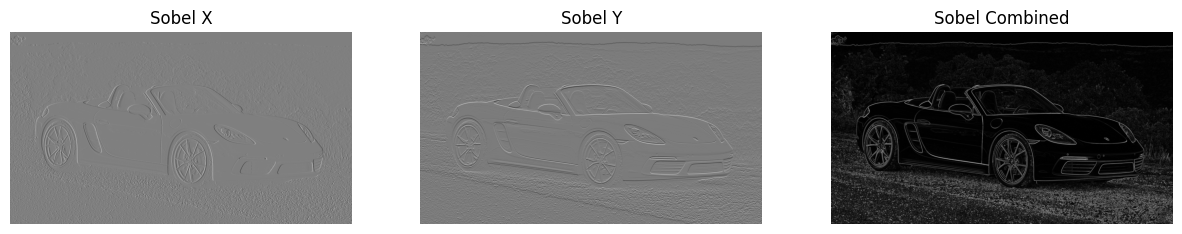

In [47]:
# Sobel Edge Detection
sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)
show_images([sobelx, sobely, sobel_combined], ["Sobel X", "Sobel Y", "Sobel Combined"], cmap='gray')

*   Mendeteksi tepi horizontal dan vertikal
*   Menggunakan operator gradien
*   Magnitude dihitung dari gradien x dan y





**HOG FEATURE**

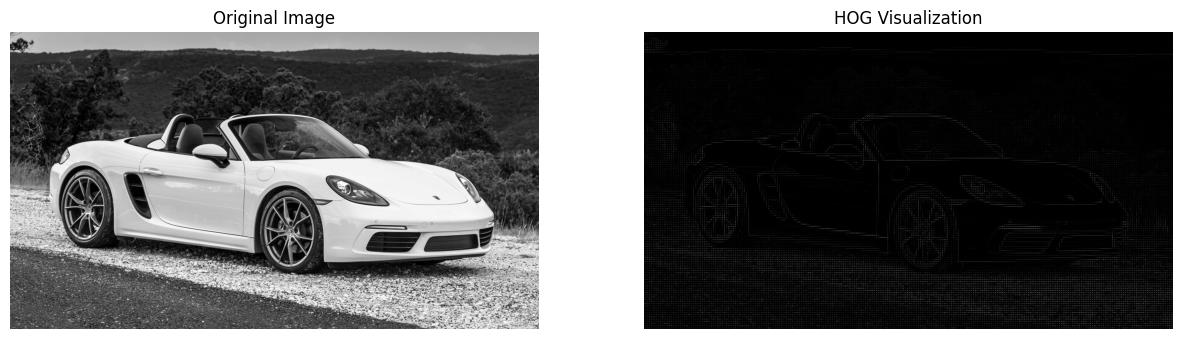

In [58]:
from skimage.feature import hog
from skimage import color

# Menghitung HOG dan mendapatkan gambar HOG
image_gray_float = image_gray.astype('float') / 255.0  # Konversi ke float
features, hog_image = hog(image_gray_float,
                           pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2),
                           visualize=True,
                           block_norm='L2-Hys')

# Menampilkan gambar asli dan gambar HOG
show_images([image_gray, hog_image], ["Original Image", "HOG Visualization"], cmap='gray')

*   Resize gambar ke ukuran standar
*   Menghitung gradien pada cell 8x8
*   Normalisasi block 2x2
*   Orientasi dibagi 9 bin



